# 4. Explore the Data

> "I don't know, what I don't know"

We want to first **visually explore** the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

For this we will start by loading the data and understanding the data structure of the dataframe we have
- Understand Data Structure & Types
- Explore **single variable graphs** - Quantitative, Categorical
- Explore **dual variable graphs** - (Q & Q, Q & C, C & C)
- Explore **multi variable graphs**

## Lets read the data

In [1]:
# Import the library we need, which is Pandas
import pandas as pd

You will find the variable `df` used quite often to store a `dataframe`

In [2]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

## Understand Data Structure and Types

In [3]:
df.shape

(10227, 10)

In [4]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


### Data Structure

So we have ten columns in our dataset. Let us understand what each one is.

Three are about the location of the Wholesale Market where Onion where sold.
- **state**: This is the 2/3 letter abbreviation for the state in India (PB is Punjab and so on)
- **city**: This is the city in India (ABOHAR, BANGALORE and so on)
- **market**: This is a string with the combination of the state and city

Three are related to the 
- **month**: Month in January, February and so on. 
- **year**: Year in YYYY representastion
- **date**: The combination of the two above.

Four are about quantity and price in these wholesale market. 
- **quantity**: The quanity of Onion arriving in the market in that month in quintals (100 kg)
- **priceMin**: The minimum price in the month in Rs./quintal
- **priceMax**: The maximum price in the month in Rs./quintal
- **priceMod**: The modal price in the month in Rs./quintal

We would expect the following the columns to be of the following type
- **CATEGORICAL**: state, city, market
- **TIME INTERVAL**: month, year, date
- **QUANTITATIVE**: quantity, priceMin, priceMax, priceModal

Let us see what pandas dataframe is reading these columns as.

In [5]:
# Get the typeof each column
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

So we are getting the quantitive columns are correctly being shown as integers and the categorical columns are showing as objects(strings) which is fine. 
However, the `date` columns is being read as an object and not a Time-Interval. Let us at least fix the `date` column and make it into a datetime object

In [6]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)

In [7]:
# Now checking for type of each column
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [8]:
# Let us see the dataframe again now
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


## Question 1 - How big is Bangalore a wholesale market compared to other cities?

Let us try to do this examination for one of the year only. So we want to reduce our dataframe for only where the year = 2010. This process is called subset.

### PRINCIPLE: Subset a Dataframe

How do you subset a dataframe on a given criteria

`newDataframe` = `df`[ <`subset condition`> ] 

In [9]:
df2010 = df[df.year == 2010]

In [10]:
df2010.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
10,ABOHAR(PB),February,2010,555,1143,1460,1322,PB,ABOHAR,2010-02-01
18,ABOHAR(PB),March,2010,385,510,878,688,PB,ABOHAR,2010-03-01
25,ABOHAR(PB),April,2010,840,466,755,611,PB,ABOHAR,2010-04-01
32,ABOHAR(PB),May,2010,2050,391,578,494,PB,ABOHAR,2010-05-01


In [11]:
# We can also subset on multiple criterias
df2010Bang = df[(df.year == 2010) & (df.city == 'BANGALORE')]

In [12]:
df2010Bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
722,BANGALORE,January,2010,423649,502,1837,1267,KNT,BANGALORE,2010-01-01
735,BANGALORE,February,2010,316685,495,1429,1011,KNT,BANGALORE,2010-02-01
748,BANGALORE,March,2010,368644,386,895,661,KNT,BANGALORE,2010-03-01
760,BANGALORE,April,2010,404805,287,730,545,KNT,BANGALORE,2010-04-01
772,BANGALORE,May,2010,395519,306,827,564,KNT,BANGALORE,2010-05-01


###  Principle: Split Apply Combine

How do we get the sum of quantity for each city.

We need to **SPLIT** the data by each city, **APPLY** the sum to the quantity row and then **COMBINE** the data again


![](../img/splitapplycombine.png)


In pandas, we use the `groupby` function to do this.

In [13]:
# Group by using city
df2010City = df2010.groupby(['city']).sum()

In [14]:
df2010City.head()

,year,quantity,priceMin,priceMax,priceMod
city,,,,,
ABOHAR,24120,11835,10896,16130,14012
AGRA,24120,756755,13213,14827,14149
AHMEDABAD,24120,1135418,8910,15819,13539
AHMEDNAGAR,24120,1678032,3955,20984,12923
ALWAR,24120,561145,8850,14717,11317


In [15]:
# If we only want to apply the sum function on quantity, then we specify the quantity column
df2010City = df2010.groupby(['city'])['quantity'].sum()

In [16]:
# Let us see this dataframe
df2010City.head()

city
ABOHAR          11835
AGRA           756755
AHMEDABAD     1135418
AHMEDNAGAR    1678032
ALWAR          561145
Name: quantity, dtype: int64

In [17]:
# To create a dataframe again, it is best to specify index as false
df2010City = df2010.groupby(['city'], as_index=False)['quantity'].sum()

In [18]:
df2010City.head()

,city,quantity
0,ABOHAR,11835
1,AGRA,756755
2,AHMEDABAD,1135418
3,AHMEDNAGAR,1678032
4,ALWAR,561145


In [19]:
# Sort the Dataframe by Quantity to see which one is on top
df2010City = df2010City.sort_values(by = "quantity", ascending = False)
df2010City.head()

,city,quantity
6,BANGALORE,6079067
16,DELHI,3508582
39,KOLKATA,3495320
56,PUNE,3326024
67,SOLAPUR,3310419


### PRINCIPLE: Visual Exploration 
Lets load the libraries required for plotting in python

In [20]:
# Load the visualisation libraries - Matplotlib
import matplotlib.pyplot as plt

In [21]:
# Let us see the output plots in the notebook itself
%matplotlib inline

In [123]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

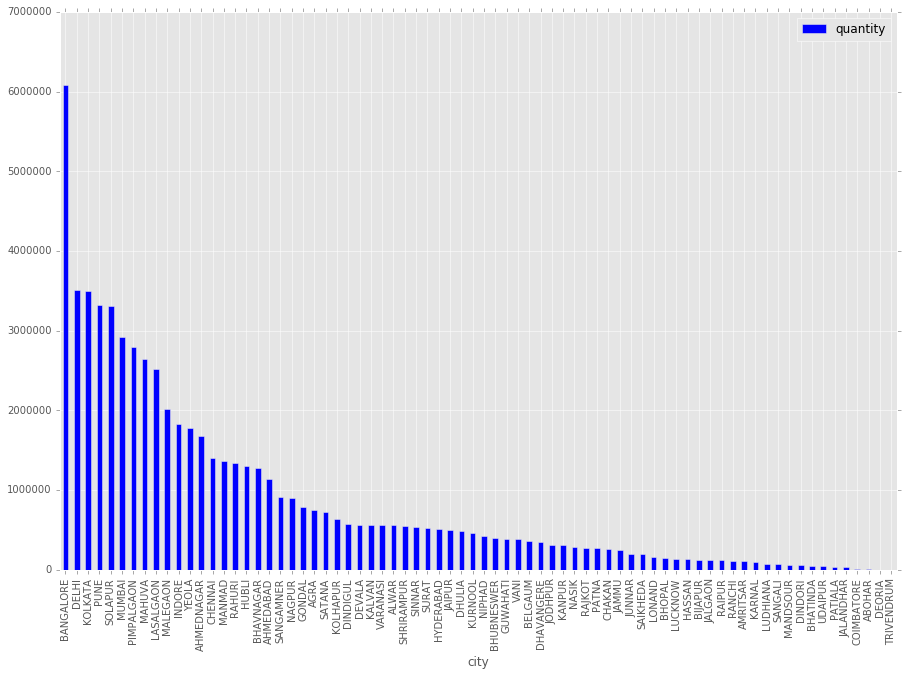

In [23]:
# Plot the Data
df2010City.plot(kind ="bar", x = 'city', y = 'quantity')

### Exercise 1: Find the State with Highest Quantity Sales in 2015?

## Question 2 - What is the monthly price variation in Bangalore? 

In [132]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [51]:
dfBang = df[df.city == 'BANGALORE']

In [52]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
717,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
718,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
719,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
720,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01


In [53]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,146,146,146,146
mean,2010,523917,558,1314,1044
std,4,302369,381,911,668
min,2004,63824,145,338,320
25%,2007,329690,307,685,551
50%,2010,403530,448,1019,836
75%,2013,661252,653,1636,1326
max,2016,1639032,2377,4698,3430


In [54]:
# Reduce the precision of numbers - so that it is easy to read
pd.set_option('precision', 0)

In [55]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,146,146,146,146
mean,2010,523917,558,1314,1044
std,4,302369,381,911,668
min,2004,63824,145,338,320
25%,2007,329690,307,685,551
50%,2010,403530,448,1019,836
75%,2013,661252,653,1636,1326
max,2016,1639032,2377,4698,3430


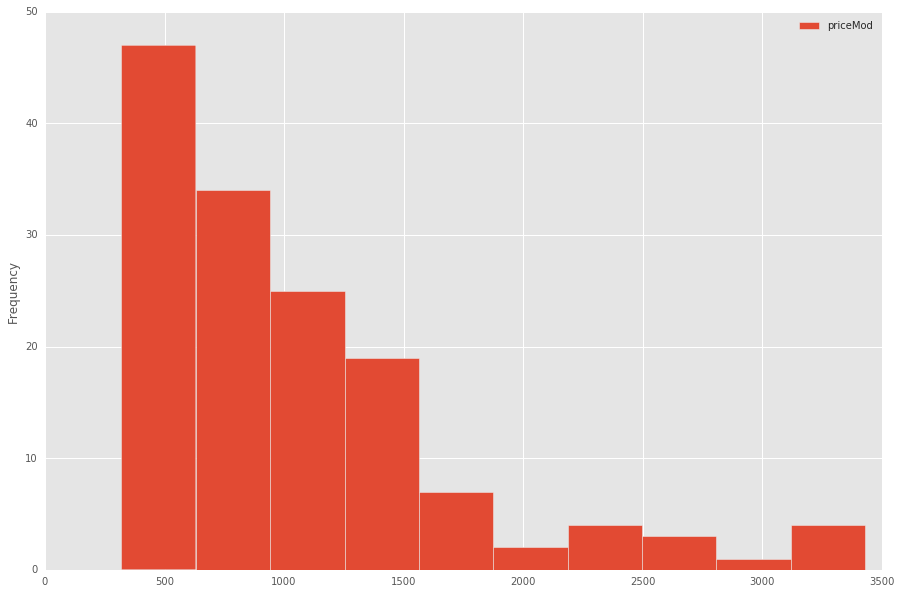

In [124]:
dfBang.plot(kind = 'hist', y = 'priceMod')

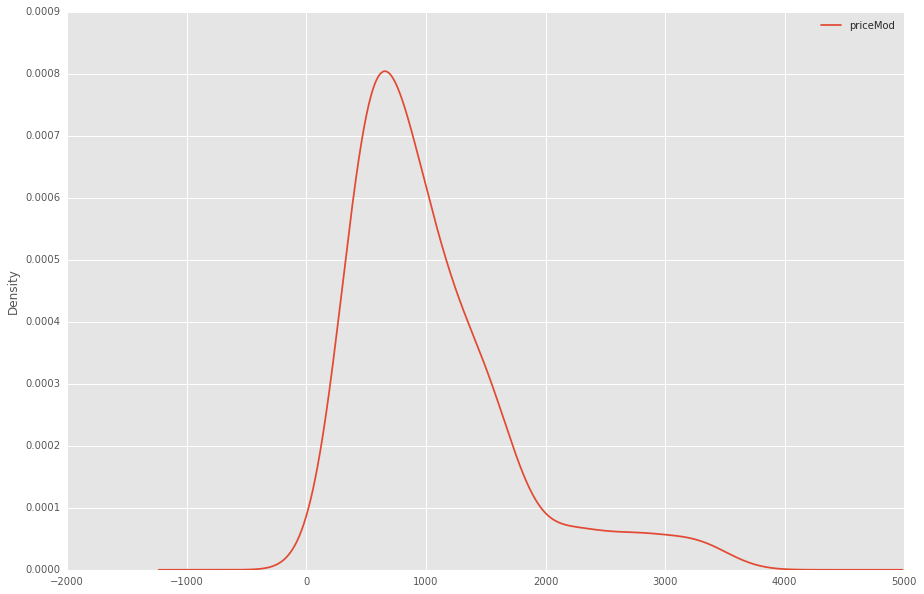

In [127]:
dfBang.plot(kind = 'kde', y = 'priceMod')

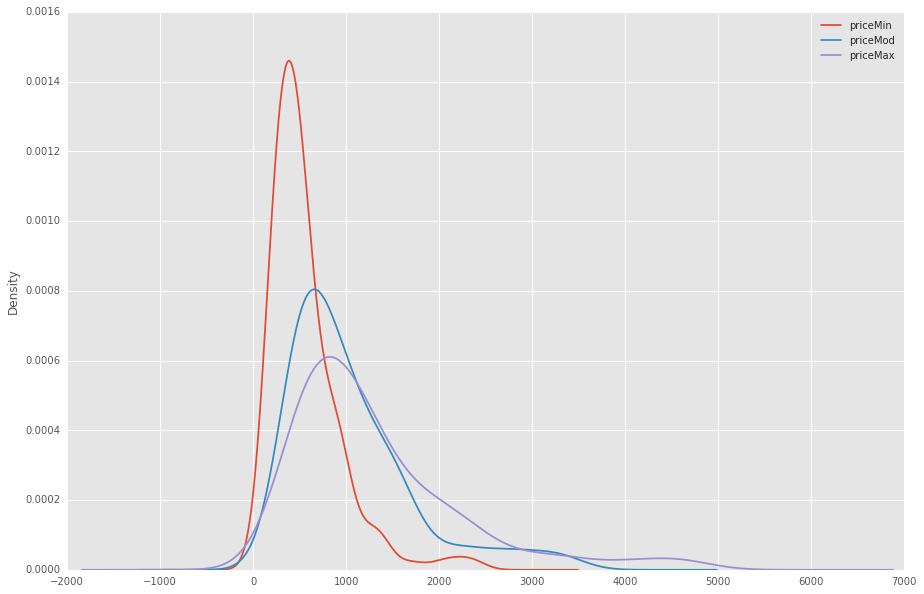

In [126]:
dfBang.plot(kind = 'kde', y = ['priceMin', 'priceMod', 'priceMax'])

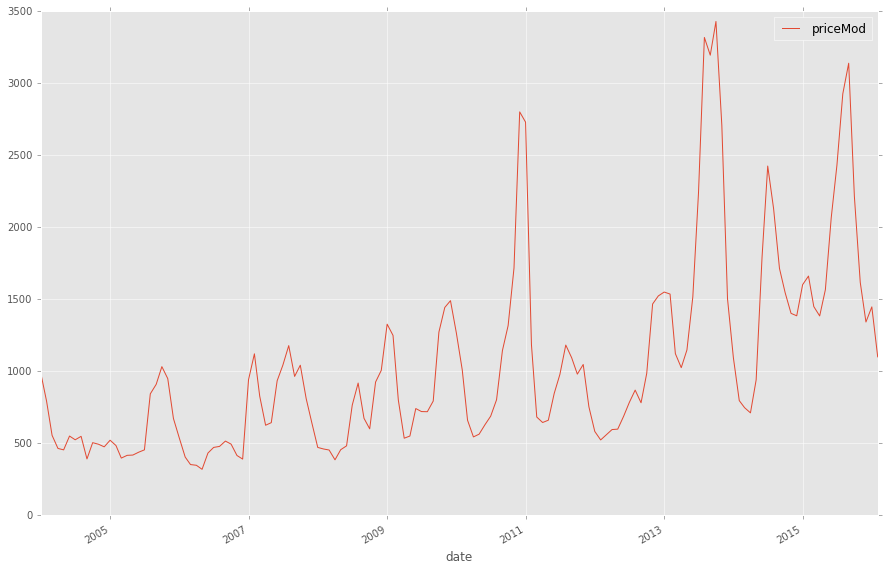

In [56]:
dfBang.plot(kind = "line", y = 'priceMod', x = "date")

In [57]:
dfBang.index

Int64Index([716, 717, 718, 719, 720, 721, 722, 723, 724, 725,
            ...
            852, 853, 854, 855, 856, 857, 858, 859, 860, 861],
           dtype='int64', length=146)

In [129]:
dfBang.sort_values(by = "date", inplace = True)
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,monthVal,priceDiff
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,1,150
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,2,129
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,3,59
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,4,99
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,5,116


In [59]:
# Set the Index for the Dataframe
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')

In [60]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


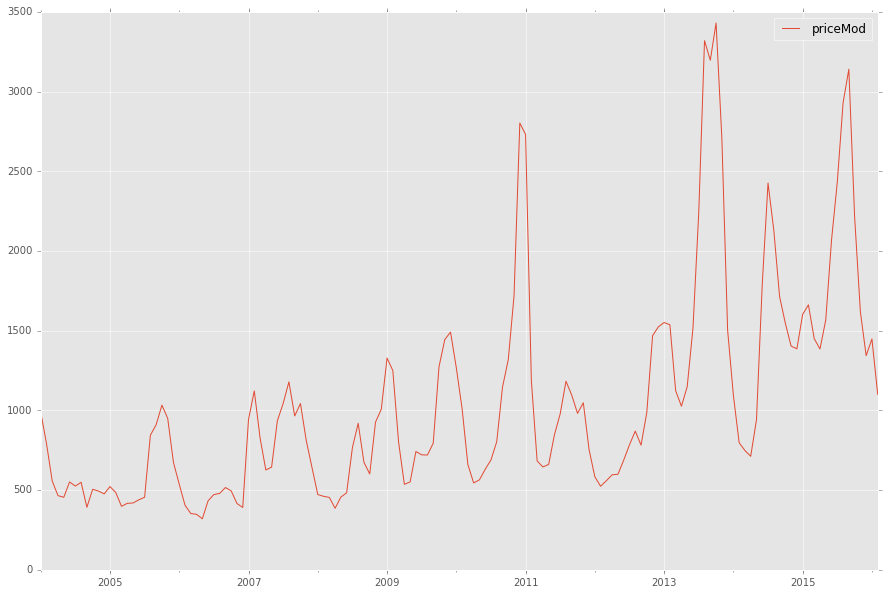

In [61]:
dfBang.plot(kind = "line", y = 'priceMod')

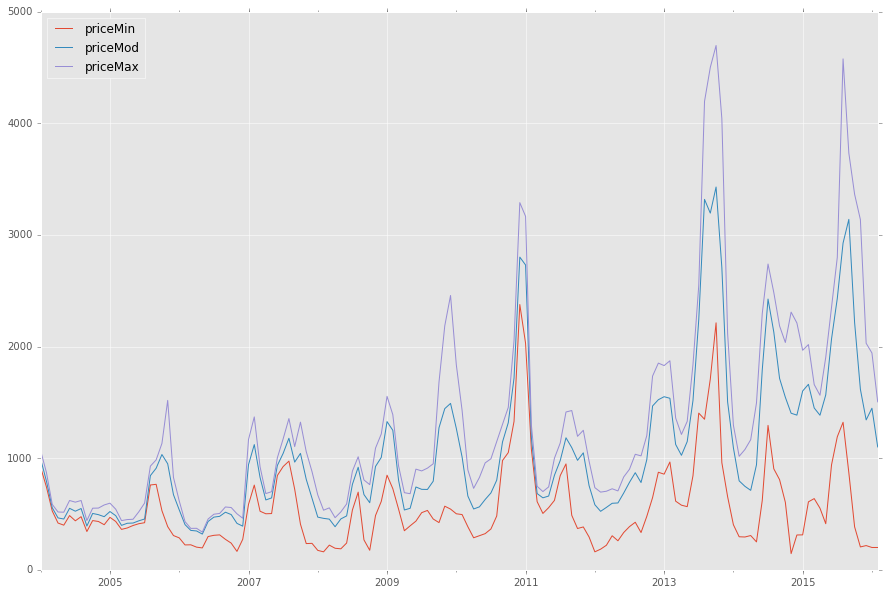

In [62]:
dfBang.plot( kind = "line", y = ['priceMin', 'priceMod', 'priceMax'])

To calculate the range of change, we will create a new price difference variable - which is the difference between the priceMin and priceMax

In [73]:
dfBang['priceDiff'] = dfBang['priceMax'] - dfBang['priceMin']

In [74]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,monthVal,priceDiff
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,1,150
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,2,129
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,3,59
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,4,99
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,5,116


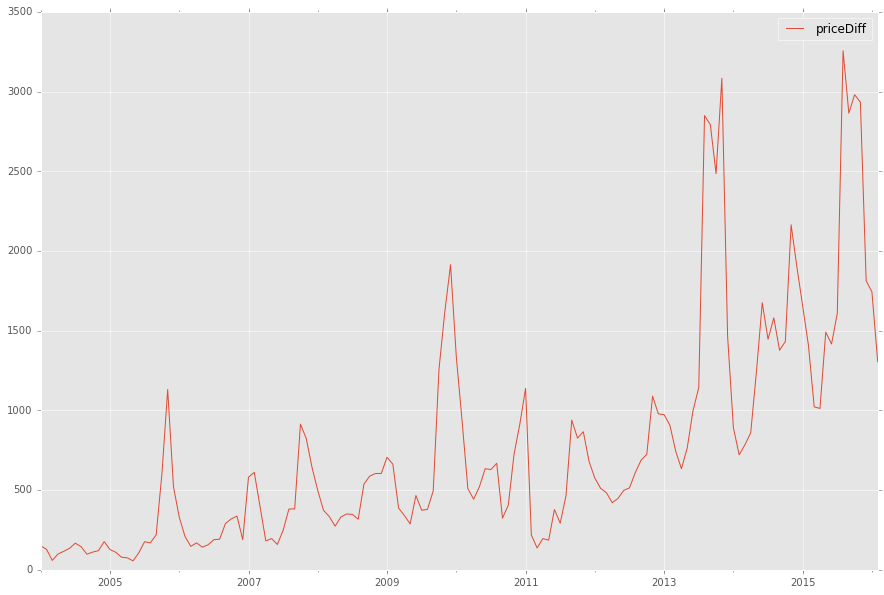

In [75]:
dfBang.plot(kind = 'line', y = 'priceDiff')

### PRINCIPLE: Pivot Table

In [84]:
dfBang['monthVal'] = pd.DatetimeIndex(dfBang['date']).month

In [87]:
dfBangPivot = pd.pivot_table(dfBang, values = "priceDiff", columns = "year", index = "monthVal")

In [88]:
dfBangPivot.head()

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
monthVal,,,,,,,,,,,,,
1,150,127,331,581,497,706,1335,1138,575,973,892,1654,1743
2,129,110,209,611,373,663,934,218,511,907,721,1409,1305
3,59,79,147,398,334,387,509,137,484,745,784,1022,NaN
4,99,75,169,181,274,341,443,196,421,634,859,1012,NaN
5,116,56,142,196,331,288,521,186,447,764,1245,1491,NaN


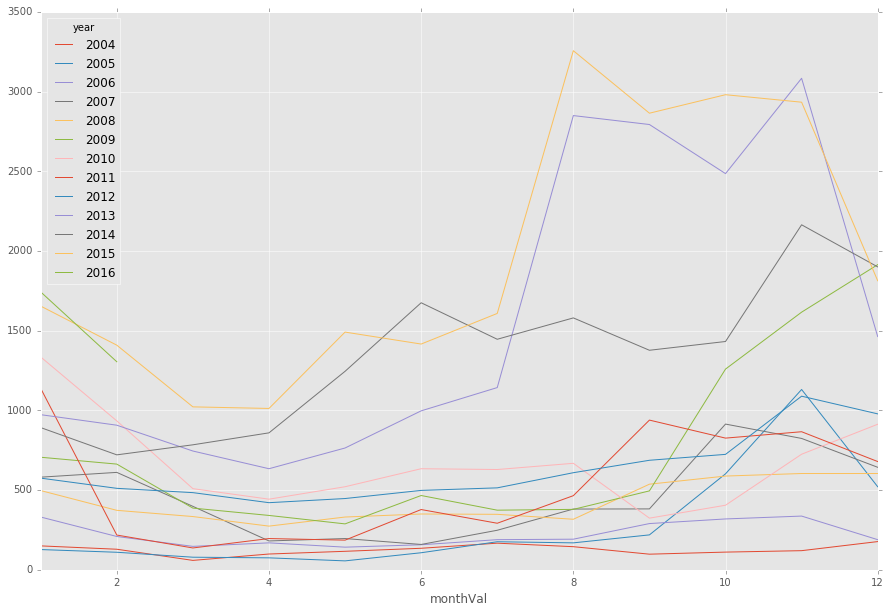

In [89]:
dfBangPivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111d04630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12757fcc0>]], dtype=object)

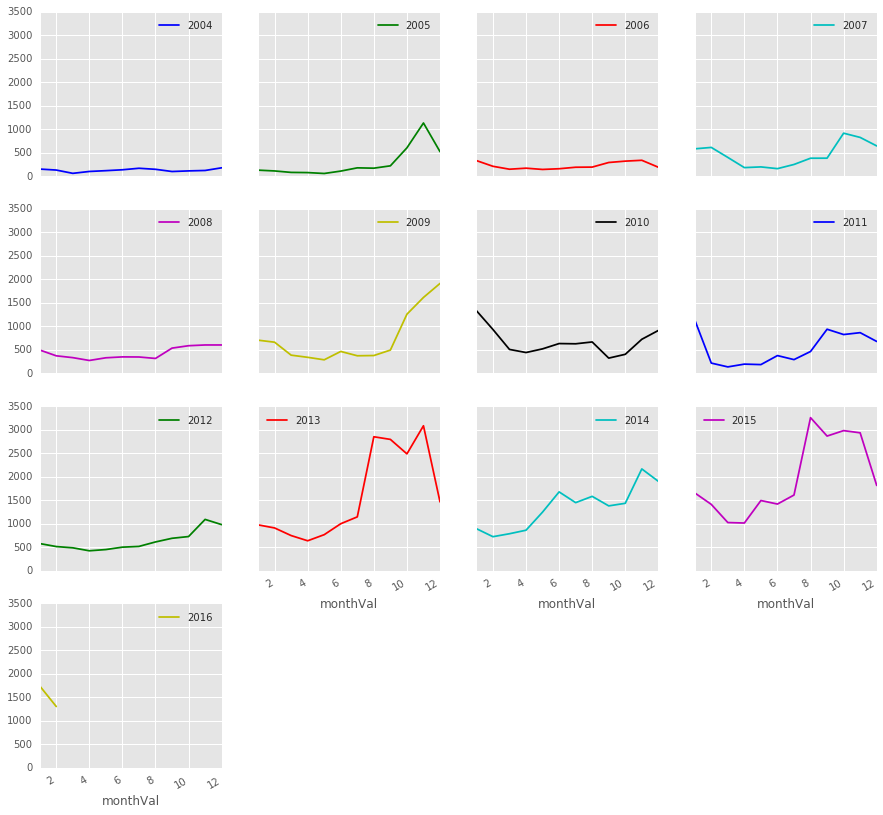

In [128]:
dfBangPivot.plot(subplots = True, figsize=(15, 15), layout=(4, 4), sharey=True)

In [131]:
??pd.pivot_table